# Aspect Based Sentiment Analysis with Ice Cream Database

### oleh :  <br/>
### Avisenna Abimanyu (13517010) <br/>
### Muhammad Akmal (13517028) <br/>
### Muhammad Nurdin Husen (13517112) <br/>

import library

In [42]:
import pandas as pd
import numpy as np
import nltk
import random
import pprint, time
import seaborn as sns
from collections import Counter
import matplotlib.dates as mdates
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from autocorrect import Speller
sys.path.append('..')
from pos_tagger.myPosTagger import POSTagger

In [43]:
#download treebank corpus dari nltk
nltk.download('treebank')
 
#download niversal tagset dari nltk
nltk.download('universal_tagset')

[nltk_data] Downloading package treebank to /Users/akmalm/nltk_data...
[nltk_data]   Package treebank is already up-to-date!
[nltk_data] Downloading package universal_tagset to
[nltk_data]     /Users/akmalm/nltk_data...
[nltk_data]   Package universal_tagset is already up-to-date!


True

### 0. Exploratory Data Analysis

In [44]:
# pd.options.display.max_rows = None
df = pd.read_csv('reviews.csv')
df["full_text"] = df.title + ' ' + df.text

In [45]:
df.head(10)

,brand,key,author,date,stars,title,helpful_yes,helpful_no,text,taste,ingredients,texture,likes,full_text
0,bj,0_bj,Ilovebennjerry,2017-04-15,3,Not enough brownies!,10.0,3.0,"Super good, don't get me wrong. But I came for...",NaN,NaN,NaN,NaN,"Not enough brownies! Super good, don't get me ..."
1,bj,0_bj,Sweettooth909,2020-01-05,5,I’m OBSESSED with this pint!,3.0,0.0,I decided to try it out although I’m not a hug...,NaN,NaN,NaN,NaN,I’m OBSESSED with this pint! I decided to try ...
2,bj,0_bj,LaTanga71,2018-04-26,3,My favorite...More Caramel Please,5.0,2.0,My caramel core begins to disappear about half...,NaN,NaN,NaN,NaN,My favorite...More Caramel Please My caramel c...
3,bj,0_bj,chicago220,2018-01-14,5,Obsessed!!!,24.0,1.0,Why are people complaining about the blonde br...,NaN,NaN,NaN,NaN,Obsessed!!! Why are people complaining about t...
4,bj,0_bj,Kassidyk,2020-07-24,1,Worst Ice Cream Ever!,1.0,5.0,This ice cream is worst ice cream I’ve ever ta...,NaN,NaN,NaN,NaN,Worst Ice Cream Ever! This ice cream is worst ...
5,bj,0_bj,Nikiera,2020-07-23,2,Way Too Salty,3.0,1.0,I bought this last night to go with Louisiana ...,NaN,NaN,NaN,NaN,Way Too Salty I bought this last night to go w...
6,bj,0_bj,Mmelvin,2017-05-28,3,"Love this flavor, but...",3.0,3.0,"This is definitely my favorite flavor, but rec...",NaN,NaN,NaN,NaN,"Love this flavor, but... This is definitely my..."
7,bj,0_bj,Shay10,2017-07-02,3,Really Wanted To Love This,4.0,1.0,"I am not a chocolate person at all, and this w...",NaN,NaN,NaN,NaN,Really Wanted To Love This I am not a chocolat...
8,bj,0_bj,caramel4dayz,2017-07-16,2,Could be better.,8.0,6.0,"I LOVE caramel, so much so that I could eat it...",NaN,NaN,NaN,NaN,"Could be better. I LOVE caramel, so much so th..."
9,bj,0_bj,RosaT777,2019-02-12,3,Salted Caramel core had NO CARAMEL,1.0,1.0,I love all the Ben & Jerry’s flavor. But recen...,NaN,NaN,NaN,NaN,Salted Caramel core had NO CARAMEL I love all ...


In [46]:
df.describe()

,stars,helpful_yes,helpful_no,taste,ingredients,texture
count,21674.000000,21674.000000,21674.000000,4265.000000,4265.000000,4265.000000
mean,4.223955,1.364815,0.443019,4.234701,4.323798,4.284642
std,1.384121,8.234123,2.568762,1.401392,1.298888,1.363423
min,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000
25%,4.000000,0.000000,0.000000,4.000000,4.000000,4.000000
50%,5.000000,0.000000,0.000000,5.000000,5.000000,5.000000
75%,5.000000,1.000000,0.000000,5.000000,5.000000,5.000000
max,5.000000,421.000000,121.000000,5.000000,5.000000,5.000000


Mengambil kolom yang dibutuhkan

In [47]:
df_training = df.drop(columns=['brand', 'key', 'author', 'date', 'helpful_yes', 'helpful_no', 'taste', 'ingredients', 'texture', 'likes', 'title', 'text'])

In [48]:
df_training.head()
df_training.describe()

,stars
count,21674.000000
mean,4.223955
std,1.384121
min,1.000000
25%,4.000000
50%,5.000000
75%,5.000000
max,5.000000


In [49]:
df_training.shape

(21674, 2)

In [50]:
df_training.drop_duplicates(inplace=True)
df_training.shape

(16256, 2)

In [51]:
df_training.head()

,stars,full_text
0,3,"Not enough brownies! Super good, don't get me ..."
1,5,I’m OBSESSED with this pint! I decided to try ...
2,3,My favorite...More Caramel Please My caramel c...
3,5,Obsessed!!! Why are people complaining about t...
4,1,Worst Ice Cream Ever! This ice cream is worst ...


Ternyata ada duplicates, maka aksi untuk drop duplicates sudah benar

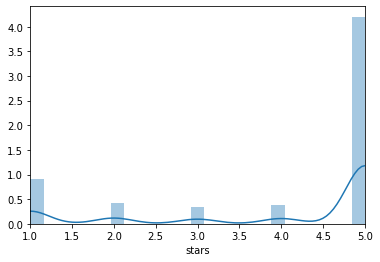

In [52]:
sns.distplot(df_training["stars"], bins=25)
plt.xlim([1,5])
plt.show()

Dapat dilihat bahwa terdapat kekurangan dari data, yaitu persebarannya kurang merata antara yang memiliki rating tinggi dengan rendah

In [53]:
# ubah rating start yang diberikan menjadi sebuah setiment 1/0 dengan sentiment positif >=3 dan kebalikannya
df_training['stars'] = (df['stars'] >= 3).astype(int)
df_training.head()

,stars,full_text
0,1,"Not enough brownies! Super good, don't get me ..."
1,1,I’m OBSESSED with this pint! I decided to try ...
2,1,My favorite...More Caramel Please My caramel c...
3,1,Obsessed!!! Why are people complaining about t...
4,0,Worst Ice Cream Ever! This ice cream is worst ...


In [54]:
df_training.rename(columns={'stars': 'sentiment'}).head()

,sentiment,full_text
0,1,"Not enough brownies! Super good, don't get me ..."
1,1,I’m OBSESSED with this pint! I decided to try ...
2,1,My favorite...More Caramel Please My caramel c...
3,1,Obsessed!!! Why are people complaining about t...
4,0,Worst Ice Cream Ever! This ice cream is worst ...


In [55]:
df_training.describe()

,stars
count,16256.000000
mean,0.787340
std,0.409202
min,0.000000
25%,1.000000
50%,1.000000
75%,1.000000
max,1.000000


In [56]:
df_training.shape

(16256, 2)

### 1. Preprocessing

In [57]:
spell = Speller(lang='en')

In [58]:
def word_tokenize(sentence):
    return nltk.word_tokenize(sentence.lower())

def process_text(text_input): # processing yang dilakukan hanya spelling correction dengan library autocorrect
    print(text_input)
    return (spell(text_input))

In [59]:
df['full_text'] = df['full_text'].astype(str)
df_training.full_text = df.full_text.str.lower()

# df_training['text'] = df_training['text'].apply(process_text)



In [60]:
df_training['text'] = df_training['full_text'].apply(word_tokenize) # tokenisasi kalimat setiap data

In [61]:
df_training.head()

,stars,full_text,text
0,1,"not enough brownies! super good, don't get me ...","[not, enough, brownies, !, super, good, ,, do,..."
1,1,i’m obsessed with this pint! i decided to try ...,"[i, ’, m, obsessed, with, this, pint, !, i, de..."
2,1,my favorite...more caramel please my caramel c...,"[my, favorite, ..., more, caramel, please, my,..."
3,1,obsessed!!! why are people complaining about t...,"[obsessed, !, !, !, why, are, people, complain..."
4,0,worst ice cream ever! this ice cream is worst ...,"[worst, ice, cream, ever, !, this, ice, cream,..."


In [62]:
# membaca kalimat-kalimat di Treebank yang sudah diberi tag
nltk_data = list(nltk.corpus.treebank.tagged_sents(tagset='universal'))

In [63]:
# penambahan status start dan end untuk penghitungan transition probability start dan end
for i in range(len(nltk_data)):
    for j in range(len(nltk_data[i])):
        if (j == 0):
            nltk_data[i][j] = nltk_data[i][j] + ('S',)
        elif (j == len(nltk_data[i]) - 1):
            nltk_data[i][j] = nltk_data[i][j] + ('E',)
        else:
            nltk_data[i][j] = nltk_data[i][j] + (nltk_data[i][j][1],)

In [64]:
# split data menjadi training dan test dengan rasio 80:20
train_set,test_set =train_test_split(nltk_data,train_size=0.80,test_size=0.20,random_state = 101)


In [65]:
print(train_set[1])

[('At', 'ADP', 'S'), ('last', 'ADJ', 'ADJ'), ('count', 'NOUN', 'NOUN'), (',', '.', '.'), ('Candela', 'NOUN', 'NOUN'), ('had', 'VERB', 'VERB'), ('sold', 'VERB', 'VERB'), ('$', '.', '.'), ('4', 'NUM', 'NUM'), ('million', 'NUM', 'NUM'), ('*U*', 'X', 'X'), ('of', 'ADP', 'ADP'), ('its', 'PRON', 'PRON'), ('medical', 'ADJ', 'ADJ'), ('devices', 'NOUN', 'NOUN'), ('in', 'ADP', 'ADP'), ('Japan', 'NOUN', 'NOUN'), ('.', '.', 'E')]


## Mulai ngetrain si pos taggernya dari sini

In [66]:
# membuat list tuple dari setiap pasangan kata dan tag di training dan test dataset
train_tagged_words = [ tup for sent in train_set for tup in sent ]
test_tagged_words = [ tup for sent in test_set for tup in sent ]
print(len(train_tagged_words))
print(len(test_tagged_words))

80310
20366


In [67]:
# check some of the tagged words.
train_tagged_words[:10]

[('Drink', 'NOUN', 'S'),
 ('Carrier', 'NOUN', 'NOUN'),
 ('Competes', 'VERB', 'VERB'),
 ('With', 'ADP', 'ADP'),
 ('Cartons', 'NOUN', 'E'),
 ('At', 'ADP', 'S'),
 ('last', 'ADJ', 'ADJ'),
 ('count', 'NOUN', 'NOUN'),
 (',', '.', '.'),
 ('Candela', 'NOUN', 'NOUN')]

In [68]:
#cek ada berapa banyak tag unik, lalu ditambahkan 2 tag yaitu S untuk Start dan E untuk End
tags = {tag1 for word,tag1,tag2 in train_tagged_words}
print(len(tags))
tags.add('S')
tags.add('E')
print(tags)

# cek vocabulary pada dataset
vocabulary = {word for word,tag1,tag2 in train_tagged_words}
print(len(vocabulary))

12
{'VERB', 'CONJ', 'S', 'E', 'PRT', 'ADJ', '.', 'X', 'PRON', 'DET', 'ADP', 'NOUN', 'ADV', 'NUM'}
11052


## Trus buat object si POS Taggernya dari sini

In [69]:
pos_tag = POSTagger(train_tagged_words, tags)
pos_tag.create_tags_df()


In [70]:
pos_tag.test(test_set)

Time taken in seconds:  30.85319709777832
Viterbi Algorithm Accuracy:  95.21531100478468


## Ini cara nyobainnya

In [71]:
test_word = ['I', 'was', 'so', 'crazily', 'angry']
answer = pos_tag.Viterbi(test_word)
print(answer)

[('I', 'PRON'), ('was', 'VERB'), ('so', 'ADV'), ('crazily', 'VERB'), ('angry', 'ADJ')]
